# SML Exercise -- Coding Logistic Regression

In [1]:
# Imports:
import numpy as np
import utils
import random
from matplotlib import pyplot as plt

In [2]:
def score(w, b, x):
    return np.dot(x, w) + b

In [3]:
# 1) Write a function called ‘sigmoid’ according to the following pseudocode:
# Input: a floating-point number 𝑧
# Output: 𝜎(𝑧)= e^z/ (1+e^𝑧)

def sigmoid(z):
    return np.exp(z) / (1+np.exp(z))

In [4]:
# 2) Write a function called ‘logistic_trick’ according to the following pseudocode:
# Input: a NumPy array with length two of weights 𝐰, bias 𝑏, the features of a single sample in a length two NumPy array 𝐱, a label 𝑦, and a learning rate with default value 𝜂=0.01.
# Output: updated weights 𝐰 and bias 𝑏.
# Procedure:
#  · Calculate the score 𝑧.
#  · Update parameters
#     · 𝐰=𝐰+𝜂(𝑦−𝜎(𝑧))𝐱
#     · 𝑏=𝑏+𝜂(𝑦−𝜎(𝑧))
#  · Return 𝐰 and bias 𝑏

def logistic_trick(w, b, x, y, n = 0.01):
    z = score(w, b, x)
    w = w + n*(y - sigmoid(z))*x
    b = b + n*(y - sigmoid(z))
    return w, b

In [5]:
# 3) Write a function called ‘log_loss’ which returns the error for a single point according to the following pseudocode:
# Input: a NumPy array with length two of weights 𝐰, bias 𝑏, the features of a single sample in a length two NumPy array 𝐱, label of a single sample 𝑦.
# Output: error contribution of a single point.
# Procedure:
#  · Calculate the score 𝑧
#  · Calculate and return 𝑦log[𝜎(𝑧)] + (1−𝑦)log[1−𝜎(𝑧)]

def log_loss(w, b, x, y):
    z = sigmoid(score(w, b, x))
    return -(y*np.log(z) + (1-y)*np.log(1-z))

In [6]:
# 4) Write a function called ‘mean_log_loss’ which returns the mean error of a batch according to the following pseudocode:
# Input: a NumPy array with length two of weights 𝐰, bias 𝑏, the features of a single sample in a length two NumPy array 𝐱, label of a single sample 𝑦.
# Output: mean log loss of the batch.
# Procedure:
#  · Calculate the error of each point using the log_loss function.
#  · Calculate and return the average log loss.

def mean_log_loss(w, b, x, y):
    total_error = 0
    for i in range(len(x)):
        total_error += log_loss(w, b, x[i], y[i])
    mean_error = total_error/len(x)
    return mean_error

In [7]:
# 5) Write a function called ‘logistic_regression’ according to the following pseudocode:
# Input: the features of all samples in a NumPy array 𝐗, a label for each sample as a NumPy array 𝑌, a learning rate with default value 𝜂=0.01, the number of epochs with default value epochs=10,000.
# Output: updated weights 𝐰 and bias 𝑏, a list containing the error after each epoch.
# Procedure:
#  · Set random values for 𝐰 and 𝑏 from a uniform distribution over the interval [−1,1).
#  · Create a blank list called ‘errors’ to hold the error values.
#  · For each epoch in range(epochs):
#     · Calculate the mean_log_loss and append the value to errors.
#     · Choose a random index number for a sample (row) in 𝐗.
#     · Update the weights 𝐰 and bias 𝑏 using the logisitic_trick function.
#  · Return 𝐰, 𝑏, and errors.

def logistic_regression(X, Y, n = 0.01, epochs = 10000):
    utils.plot_points(X, Y)
    w = [1.0 for i in range(len(X[0]))]
    b = 0.0
    errors = []
    for epoch in range(epochs):
        utils.draw_line(w[0], w[1], b, color='grey', linewidth=1.0, linestyle='dotted')
        error = mean_log_loss(w, b, X, Y)
        errors.append(error)
        i = random.randint(0, len(X) - 1)
        w, b = logistic_trick(w, b, X[i], Y[i], n)
    utils.draw_line(w[0], w[1], b)
    plt.show()
    plt.scatter(range(epochs), errors)
    return w, b, errors

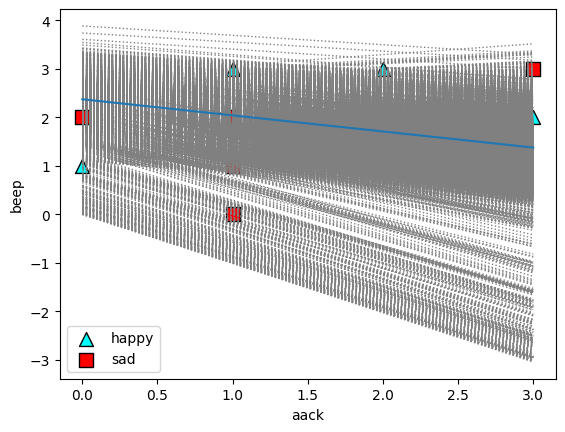

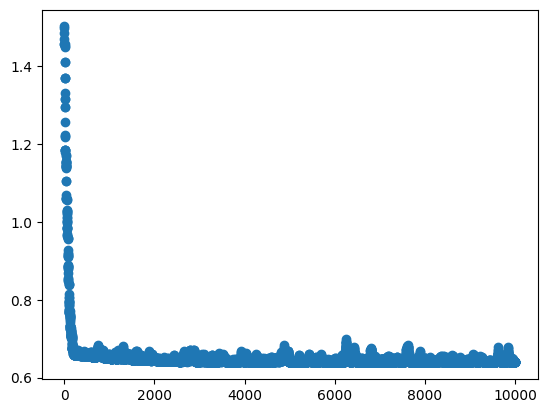

In [11]:
# 6) Hardcode the features 𝐗 and the labels 𝑌 in NumPy arrays, taking values from the table below -> 𝒙𝒄𝒓𝒂𝒄𝒌 𝒙𝒅𝒐𝒊𝒏𝒌 𝒚.
# Train a logistic classifier using the logistic_regression function. Plot the best fit line along with the datapoints. Plot the errors vs. epochs.

X = np.array([[3, 3], [1, 0], [0, 2], [1, 1], [1, 2], [0, 1], [1, 3], [2, 2], [2, 3], [3, 2]])
Y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])



w, b, errors = logistic_regression(X, Y)

In [9]:
# 7) Add a markdown cell to discuss how well the model fits and make observations about the plots. 
# Compare these results to those of the perceptron you developed in ‘Exercise -- perceptron training and evaluation’ – what is similar and what is different?

**Explanations:**


**Current Perceptron Results:**

1. Model Fit: The model appears to have learned a reasonably well-defined final position for the decision boundary. There are only a couple of misclassifications (about 3 data points, as indicated by the confusion matrix below) in the wrong positions, judging from the previous model's points.

2. Error Plot: This plot shows a sudden decrease in errors, which then levels out as the number of epochs increases.


**Previous Perceptron Results:**

1. Model Fit: The perceptron model appears to have learned a decision boundary that separates the two classes reasonably well. The best-fit line seems to correctly classify most of the data points, with only a few misclassifications.

2. Error Plot: The error plot shows a steep decline in error values initially, which then levels off as the number of epochs increases.

3. Early Stopping: Based on the first graph, it is evident that some of the gray lines were more optimal than the final blue line of best fit. If training could have stopped earlier, one of those gray lines might have provided better separation, resulting in fewer misclassifications.


**Comparison of Previous and Current:**

The current model appears to be better than the previous one for a couple of reasons. First, there are fewer misclassifications—the previous model misclassified 4 data points, whereas this one only has 3. Second, the error rate showed a very sudden decrease from the beginning of the plot and then started leveling off. While the end result is mostly the same, the previous model took its time to reach a low level before eventually leveling off.

In [14]:
import turicreate as tc

datadict = {'aack': X[:,0], 'beep':X[:,1], 'labels': Y}
data = tc.SFrame(datadict)

print(tc.evaluation.confusion_matrix(data['labels'], class_predictions))


+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      0       |        1        |   2   |
|      0       |        0        |   3   |
|      1       |        0        |   1   |
|      1       |        1        |   4   |
+--------------+-----------------+-------+
[4 rows x 3 columns]



In [16]:
# Here is the explanation again, in case the markdown cell isn't visible:

# Explanations:

# Current Perceptron Results:

# 1. Model Fit: The model appears to have learned a reasonably well-defined final position for the decision boundary. There are only a couple of misclassifications 
# (about 3 data points, as indicated by the confusion matrix above) in the wrong positions, judging from the previous model's points.
# 2. Error Plot: This plot shows a sudden decrease in errors, which then levels out as the number of epochs increases.

# Previous Perceptron Results:

# 1. Model Fit: The perceptron model appears to have learned a decision boundary that separates the two classes reasonably well. The best-fit line seems to correctly classify 
# most of the data points, with only a few misclassifications.
# 2. Error Plot: The error plot shows a steep decline in error values initially, which then levels off as the number of epochs increases.
# 3. Early Stopping: Based on the first graph, it is evident that some of the gray lines were more optimal than the final blue line of best fit. If training could have stopped 
# earlier, one of those gray lines might have provided better separation, resulting in fewer misclassifications.

# Comparison of Previous and Current:

# The current model appears to be better than the previous one for a couple of reasons. First, there are fewer misclassifications—the previous model misclassified 4 data points, 
# whereas this one only has 3. Second, the error rate showed a very sudden decrease from the beginning of the plot and then started leveling off. While the end result is mostly the same, 
# the previous model took its time to reach a low level before eventually leveling off.